<a href="https://colab.research.google.com/github/RenataTimpano/comparacao_de_modelos_de_machine_learning/blob/main/ATCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importar as bibliotecas

In [ ]:
import numpy as np
import pandas as pd


#### Ler o dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_S = pd.read_csv('/content/drive/MyDrive/Colab/processed-cleveland.csv')
data_S.head()

,RestBP,Cholesterol,Blood Sugar,ECG,MaxHeart,ExerciseAngina,oldpeak,slope,MajorVessels,thal,Target
0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Usando a seguinte função, nós podemos saber mais sobre o número de instâncias que pertencem a cada categoria.

In [ ]:
# data_S.groupby('Outcome').size()

# data_S.describe()

Object `pandas.Dataframe.groupby()` not found.


#### Dividir o dataset em recursos e variáveis de destino ou labels

In [ ]:
X=data_S.iloc[:,0:7].values
Y=data_S.iloc[:,8].values

In [ ]:
print(X[:,1])

In [ ]:
from sklearn.preprocessing import LabelEncoder
LEncoder =LabelEncoder()
y=LEncoder.fit_transform(Y)

#### Escalando recursos para classificação

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Treinando e prevendo para classificação

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=23)

#### Preenchendo o modelo com os dados de treinamento

In [ ]:
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(y_pred)

NameError: ignored

#### Avaliando a acurácia

In [ ]:
acc =  classifier.score(X_test, y_test)
print(acc)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#### Importando Seaborn para usar o mapa de calor

In [ ]:
import seaborn as sns

### **Regressão Logística**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 5)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
df = pd.read_csv("framingham.csv")

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4240, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


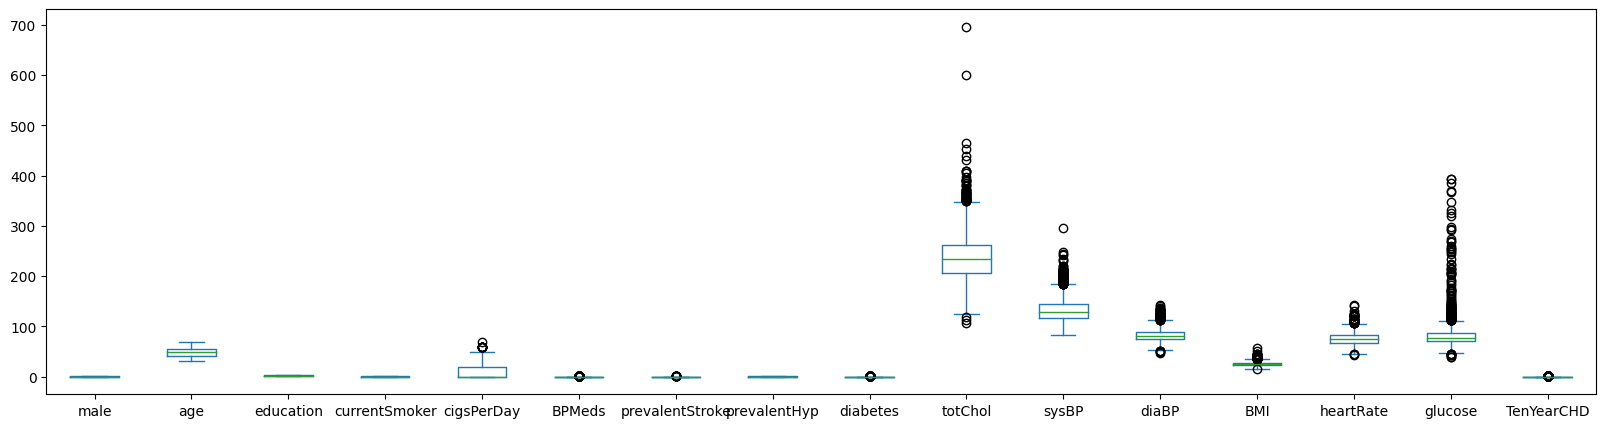

In [ ]:
df.plot(kind='box')
plt.show()

In [ ]:
df['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

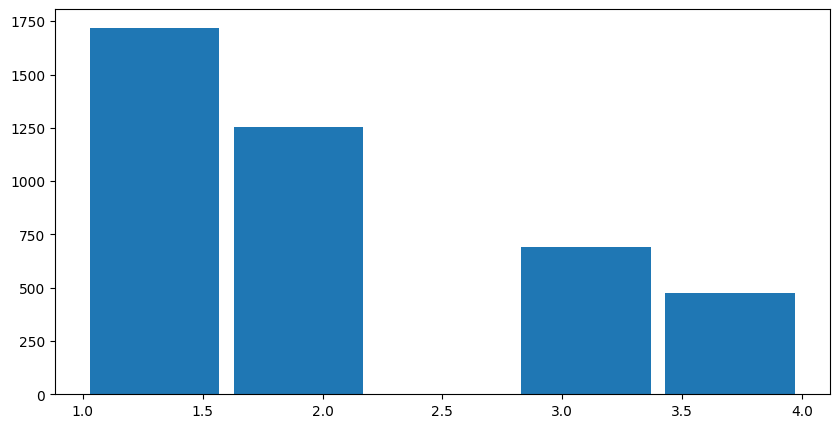

In [ ]:
plt.hist(df['education'],5, rwidth=0.9)
plt.show()

In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
df = df.drop("education",axis='columns')
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
missing = [var for var in df.columns if df[var].isnull().sum()>0]
missing

['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

In [ ]:
Total_missing_rows=0
for col in missing:
    Total_missing_rows=Total_missing_rows+df[col].isnull().sum()
Total_missing_rows

540

In [ ]:
percent_missing_rows = (Total_missing_rows/df.shape[0])*100
print("We have {}% missing values".format(percent_missing_rows))

We have 12.735849056603774% missing values


In [ ]:
df = df.dropna()
df.shape

(3751, 15)

In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
y = df[["TenYearCHD"]]
X = df.drop("TenYearCHD",axis=1)
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[10,:]

array([-0.89582297,  0.04977825, -0.97706903, -0.75552698, -0.17704382,
       -0.0750335 , -0.67328498, -0.1671911 ,  0.38273138,  0.02865074,
       -0.58154723, -0.71297614, -0.05889514, -0.24624229])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic_regression = LogisticRegression()
Logistic_regression.fit(X_train,y_train)
test_prediction = Logistic_regression.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
test_conf_matrix = confusion_matrix(y_test, test_prediction)
test_conf_matrix

array([[938,   7],
       [168,  13]])

In [ ]:
test_acc_score = accuracy_score(y_test, test_prediction)
test_acc_score

0.844582593250444

In [ ]:
test_class_report = classification_report(y_test,test_prediction)
print(test_class_report)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       945
           1       0.65      0.07      0.13       181

    accuracy                           0.84      1126
   macro avg       0.75      0.53      0.52      1126
weighted avg       0.82      0.84      0.79      1126



In [ ]:
train_prediction = Logistic_regression.predict(X_train)
train_acc_score = accuracy_score(y_train, train_prediction)
train_acc_score

0.8571428571428571

In [ ]:
print('Training set score: {:.4f}'.format(train_acc_score))

print('Test set score: {:.4f}'.format(test_acc_score))

Training set score: 0.8571
Test set score: 0.8446


              precision    recall  f1-score   support

           0       0.85      0.99      0.91       945
           1       0.65      0.07      0.13       181

    accuracy                           0.84      1126
   macro avg       0.75      0.53      0.52      1126
weighted avg       0.82      0.84      0.79      1126



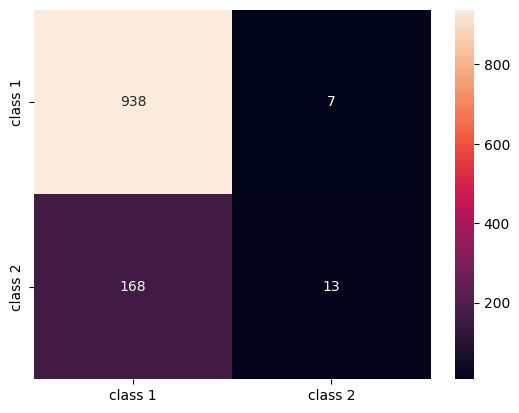

In [ ]:
classes_names = ['class 1', 'class 2']
cm = pd.DataFrame(confusion_matrix(y_test, test_prediction),
                  columns=classes_names, index = classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, test_prediction))

Arvore Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
test_prediction = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(y_test, test_prediction)

In [ ]:
ac_dt

0.7513321492007105

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       945
           1       0.24      0.24      0.24       181

    accuracy                           0.75      1126
   macro avg       0.54      0.55      0.55      1126
weighted avg       0.75      0.75      0.75      1126



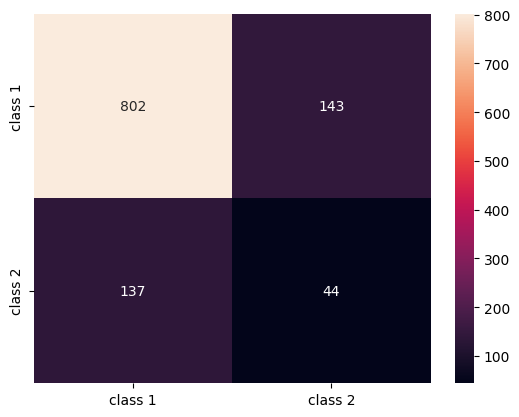

In [ ]:
classes_names = ['class 1', 'class 2']
cm = pd.DataFrame(confusion_matrix(y_test, test_prediction),
                  columns=classes_names, index = classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, test_prediction))

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
test_prediction = knn.predict(X_test)

In [ ]:
ac_knn = accuracy_score(y_test, test_prediction)

In [ ]:
ac_knn

0.8232682060390764

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       945
           1       0.34      0.10      0.16       181

    accuracy                           0.82      1126
   macro avg       0.59      0.53      0.53      1126
weighted avg       0.77      0.82      0.78      1126



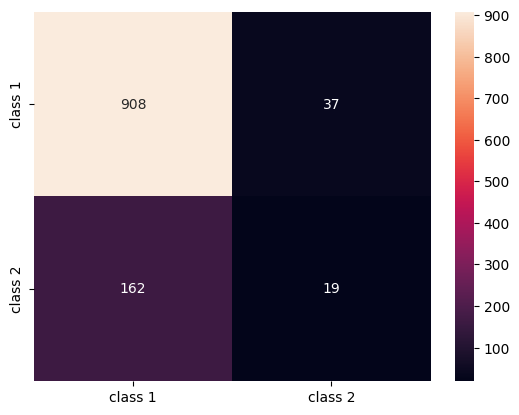

In [ ]:
classes_names = ['class 1', 'class 2']
cm = pd.DataFrame(confusion_matrix(y_test, test_prediction),
                  columns=classes_names, index = classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, test_prediction))

radom forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
test_prediction =rf.predict(X_test)

In [ ]:
ac_rf=accuracy_score(y_test, test_prediction)

In [ ]:
ac_rf

0.8419182948490231

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       945
           1       0.57      0.07      0.13       181

    accuracy                           0.84      1126
   macro avg       0.71      0.53      0.52      1126
weighted avg       0.80      0.84      0.79      1126



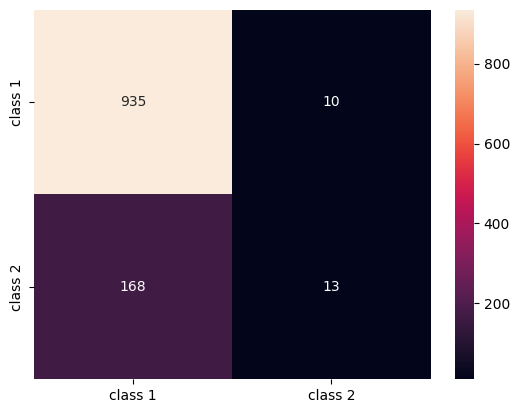

In [ ]:
classes_names = ['class 1', 'class 2']
cm = pd.DataFrame(confusion_matrix(y_test, test_prediction),
                  columns=classes_names, index = classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, test_prediction))

SVM


In [ ]:
from sklearn.svm import SVC
sv=SVC()

In [ ]:
sv.fit(X_train, y_train)

SVC()

In [ ]:
test_prediction = sv.predict(X_test)

In [ ]:
ac_sv=accuracy_score(y_test, test_prediction)

In [ ]:
ac_sv

0.8401420959147424

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       945
           1       0.67      0.01      0.02       181

    accuracy                           0.84      1126
   macro avg       0.75      0.50      0.47      1126
weighted avg       0.81      0.84      0.77      1126



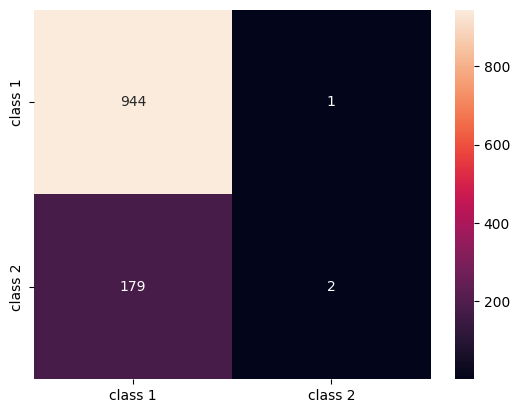

In [ ]:
classes_names = ['class 1', 'class 2']
cm = pd.DataFrame(confusion_matrix(y_test, test_prediction),
                  columns=classes_names, index = classes_names)

sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, test_prediction))

Verificação dos resultados finais

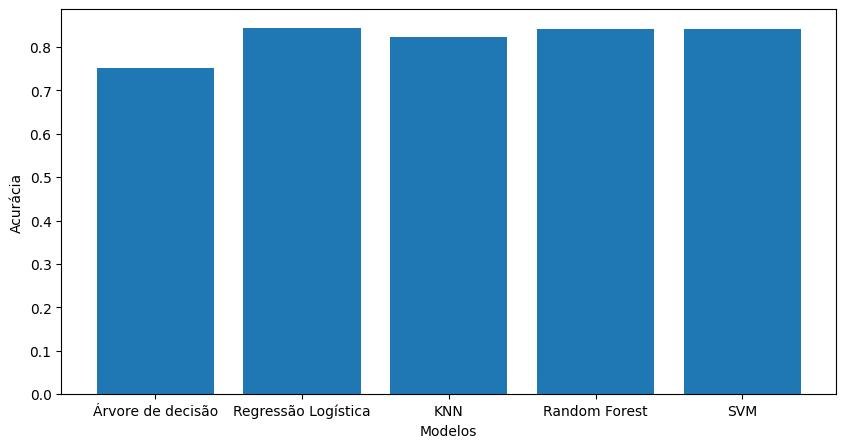

In [ ]:
plt.bar(['Árvore de decisão', 'Regressão Logística', 'KNN', 'Random Forest', 'SVM'],[ac_dt, test_acc_score, ac_knn, ac_rf, ac_sv])
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.show()
